## Machine Learning Lab 1

## Assignment 1 (Deadline : 15/10/2020 11:59PM)

### Q1 : Loss Functions (30 points)

Implement the following loss functions using numpy (each function should take two numpy arrays as arguments and return the value of the loss):

1. Huber Loss (10 points)
2. Hinge Loss (10 points)
3. Cross Entropy Loss (10 points)

In [1]:
import numpy as np
HUBER_DELTA = 5

In [2]:
## Random Entries for Huber loss
pred = np.array([3,4,5,6,7])
actual = np.array([4,9,9,5,10])

In [3]:
def huber_loss(pred, actual, delta = HUBER_DELTA):
    N = pred.shape[0]
    ## Identify indices where absolute diff between pred and actual is less than delta
    delta_indexes =  abs(pred - actual) < delta 
    d1 = np.sum(0.5*np.square(pred[delta_indexes] - actual[delta_indexes]))
    d2 = np.sum(abs(pred[~delta_indexes] - actual[~delta_indexes])*delta - 0.5*np.square(delta))
    return (d1 + d2)/N
huber_loss(pred,actual)

5.2

In [4]:
## Random Entries for Hinge loss
pred_c =  np.array([-0.3,-0.5,6.6,0.2,0.9]) 
actual_c = np.array([1,-1,-1,1,1])

In [5]:
def hinge_loss(pred, actual):
    N = pred.shape[0]
    return np.sum(np.maximum(0, (1 - pred*actual)))/N
hinge_loss(pred_c,actual_c)

2.06

In [6]:
## Random Entries for cross entropy loss
pred_c1 = np.array([0.2,0.5,0,0.7,0.05])
actual_c1 = np.array([1,0,0,1,1])

In [7]:
def cross_entropy_loss(pred, actual):
    N = pred.shape[0]
    return (-np.nansum(np.log(pred)*actual )- np.nansum(np.log(1- pred)*(1-actual)))/N
cross_entropy_loss(pred_c1, actual_c1)

<ipython-input-7-9bf75c7db4d5>:3: RuntimeWarning: divide by zero encountered in log
  return (-np.nansum(np.log(pred)*actual )- np.nansum(np.log(1- pred)*(1-actual)))/N
<ipython-input-7-9bf75c7db4d5>:3: RuntimeWarning: invalid value encountered in multiply
  return (-np.nansum(np.log(pred)*actual )- np.nansum(np.log(1- pred)*(1-actual)))/N


1.1309984620973537

In [8]:
e = 0.00001
pred = pred_c1
actual = actual_c1
-np.sum(np.log(pred+e)*actual + np.log(1- pred + e )*(1-actual))/len(pred)

1.1309396092743624

### Q2 : Visualizing Taylor Series (10 points)

Taylor series for a function $f(x)$ about $x=a$ is :
$$\begin{align*}f\left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( a \right)}}{{n!}}{{\left( {x - a} \right)}^n}} \\ & = f\left( a \right) + f'\left( a \right)\left( {x - a} \right) + \frac{{f''\left( a \right)}}{{2!}}{\left( {x - a} \right)^2} + \frac{{f'''\left( a \right)}}{{3!}}{\left( {x - a} \right)^3} + \cdots \end{align*}$$

Visualize the 1st, 2nd and 4th order Taylor series approximation for cos(x) at $x=0$


In [9]:
import matplotlib.pyplot as plt
import math

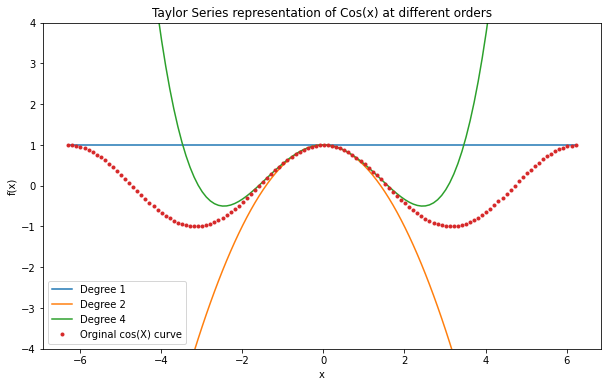

In [10]:
##Taylor Series approximation of Cos(X) at x = 0
a= 0
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

y1 = np.cos(a) - np.sin(a)*x

y2 = np.cos(a) - np.sin(a)*x - (np.cos(a)*np.power(x,2))/math.factorial(2)

y4 = np.cos(a) - np.sin(a)*x - (np.cos(a)*np.power(x,2))/math.factorial(2) + (np.sin(a)*np.power(x,3))/math.factorial(3) + (np.cos(a)*np.power(x,4))/math.factorial(4)

y = np.cos(x)

plt.figure(figsize = (10,6))
plt.plot(x,y1, label= 'Degree 1')
plt.plot(x,y2, label = 'Degree 2')
plt.plot(x,y4, label = 'Degree 4')
plt.plot(x, y, '.', label = 'Orginal cos(X) curve')
plt.ylim([-4,4])
plt.legend()
plt.title('Taylor Series representation of Cos(x) at different orders')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Q3 : Visualising Loss surface in weight space (20 points)

Consider a loss function defined in terms of weights w1 and w2 as : $$ J = \frac{1}{2}[(w_1 - w_2)^2 + (25 - w_1)^2]$$

1. Plot the loss surface in the weight space $w_1$ and $w_2$  (10 points)
2. At any three points, plot the direction of the gradient at that point (10 points)

In [11]:
def get_gradient(x,y):
    '''get the gradient of the loss function J where J is 0.5*(np.square(x-y) + np.square(25-x))'''
    return  2*x-y -25, y-x 

In [12]:
xlist = np.arange(-100, 120, 1)
ylist = np.arange(-100, 120, 1)
x, y = np.meshgrid(xlist, ylist)
J = 0.5*(np.square(x-y) + np.square(25-x))

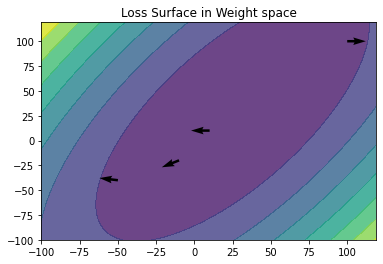

In [14]:
fig,ax=plt.subplots(1,1)
ax.contourf(x,y, J,alpha = 0.8)
ax.quiver(100,100,*get_gradient(100,100))
ax.quiver(10, 10 , *get_gradient(10,10)) 
ax.quiver(-10 ,-20, *get_gradient(-10, -20)) 
ax.quiver(-50 ,-40, *get_gradient(-50, -40)) 
plt.title('Loss Surface in Weight space')
plt.show()